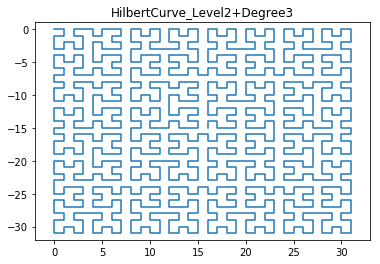

D:\python\Anaconda2\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [1]:
import hcindex2xy as hc
import matplotlib
import matplotlib.backends.backend_pdf as pltBack
import matplotlib.lines as lines
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
from optparse import OptionParser
import os
import sys
import timeserieprocess as tsp
import timeserieprocess_matrix as tspm
import timeserieprocess_matrix_outfile_training as tspmot
import Multiple_Level_Snake_Hilbert as mh

#-------------Hilber curve -------------------
rr,cc=mh.level_two(3)


t = np.arange(1024)
t = np.array(t)
#y = np.zeros((65536,), dtype=float64)
mu    = 0.0
sigma = 0.5
# Gaussian noise,mean and standard deviation
weight = 1.0
frequency = 143
#----------------------------
#prefix = "testing_dataset\cos"+str(frequency)+"\cos"+str(frequency)+"_test_"
prefix = "training_dataset\cos"+str(frequency)+"\cos"+str(frequency)+"_"
suffix = ".data"
i=0
for nn in xrange(0,500):

    #y = np.sin(2.0*np.pi*t/32)+weight*np.random.normal(mu,sigma,len(t))
    #y= t/1024.0*3.0-1.5
    y = np.cos(2.0*np.pi*t/frequency)+weight*np.random.normal(mu,sigma,len(t))
    #plt.plot(y[:60])
    filename = prefix+str(nn+1000)
    datafile = filename+'.dat'
    headtitle = '# cos-Function Plus Noise sigma: '+str(sigma)+",frequency:"+str(frequency)
    np.savetxt(filename+'.dat',np.transpose([t,y]),fmt=['%g','%3.8f'], delimiter="  ",header=headtitle,comments='#time amplitude')

    #--------------------------------
    imagefile = filename+'.png'
    kk = tspmot.processFile(datafile,32,1024,0,rr,cc,imagefile)
    
    
    #-----------------testing dataset-----------------------------

#----------------------------
prefix = "testing_dataset\cos"+str(frequency)+"\cos"+str(frequency)+"_test_"
#prefix = "training_dataset\cos"+str(frequency)+"\cos"+str(frequency)+"_"

for nn in xrange(0,500):

    #y = np.sin(2.0*np.pi*t/32)+weight*np.random.normal(mu,sigma,len(t))
    #y= t/1024.0*3.0-1.5
    y = np.cos(2.0*np.pi*t/frequency)+weight*np.random.normal(mu,sigma,len(t))
    #plt.plot(y[:60])
    filename = prefix+str(nn+1000)
    datafile = filename+'.dat'
    headtitle = '# cos-Function Plus Noise sigma: '+str(sigma)+",frequency:"+str(frequency)
    np.savetxt(filename+'.dat',np.transpose([t,y]),fmt=['%g','%3.8f'], delimiter="  ",header=headtitle,comments='#time amplitude')

    #--------------------------------
    imagefile = filename+'.png'
    kk = tspmot.processFile(datafile,32,1024,0,rr,cc,imagefile)
